# Análisis Final, Cuellos de Botella V.3

# Monetización por Cancha.

1. Plot hrs perdidas v/s zona
2. Plot hrs perdidas v/s bloque horario
3. plot dinero perdido v/s zona
4. plot dinero perdido v/s bloque horario

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns
from manager_propio import *
from IPython.display import clear_output

cols = ['Total Time','Datei','Datef','Ti','Tf']

#Cargamos el dataset de actividades
actividad = pd.read_csv('actividad_v2.csv')
actividad = actividad.drop('Unnamed: 0',axis=1)
#actividad = actividad.drop(cols,axis=1)
actividad['Start Act'] = pd.to_datetime(actividad['Start Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['End Act'] = pd.to_datetime(actividad['End Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['date start'] = pd.to_datetime(actividad['Start Act']).dt.date
actividad['date end'] = pd.to_datetime(actividad['End Act']).dt.date
actividad['time start'] = pd.to_datetime(actividad['Start Act']).dt.time
actividad['time end'] = pd.to_datetime(actividad['End Act']).dt.time
actividad['Day of year [In]'] = pd.to_datetime(actividad['Start Act']).dt.dayofyear
actividad['Day of year [Out]'] = pd.to_datetime(actividad['End Act']).dt.dayofyear
actividad['time Act'] = ((actividad['End Act']) - pd.to_datetime(actividad['Start Act']))/np.timedelta64(1, 's')

#cargamos el dataset de las colas antiguas
colas_old = pd.read_csv('colas.csv')
colas_old = colas_old.drop('Unnamed: 0',axis=1)
colas_old['Start Cola'] = pd.to_datetime(colas_old['Start Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas_old['End Cola'] = pd.to_datetime(colas_old['End Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas_old['date start'] = pd.to_datetime(colas_old['Start Cola']).dt.date
colas_old['date end'] = pd.to_datetime(colas_old['End Cola']).dt.date
colas_old['time start'] = pd.to_datetime(colas_old['Start Cola']).dt.time
colas_old['time end'] = pd.to_datetime(colas_old['End Cola']).dt.time
colas_old['Day of year [In]'] = pd.to_datetime(colas_old['Start Cola']).dt.dayofyear
colas_old['Day of year [Out]'] = pd.to_datetime(colas_old['End Cola']).dt.dayofyear
colas_old['time cola'] = ((colas_old['End Cola']) - pd.to_datetime(colas_old['Start Cola']))/np.timedelta64(1, 's')

#Filtramos por el termino de las 3 hrs
colas_old = colas_old[(colas_old['time cola'] < 10800) & (colas_old['time cola'] > 0)]  #timepos mayores a 0 minutos y menores a 3 hrs


#Cargamos el dataset de las nuevas colas. con el filtro de las 3 horas
colas = pd.read_csv("colas_filtradas_v2.csv")  #ya tiene las horas cambiadas
colas = colas.drop('Unnamed: 0',axis=1)
colas['Start Cola'] = pd.to_datetime(colas['Start Cola'])
colas['End Cola'] = pd.to_datetime(colas['End Cola'])

#snit
colas = colas.replace(['SNIT | SNIT | SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT'], 'SNIT')
colas_old = colas_old.replace(['SNIT | SNIT | SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT'], 'SNIT')
#moph-silvinita
colas = colas.replace(['MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL',
       'SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
       'MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA'],
        'MOP-H-BL | SILVINITA')
colas_old = colas_old.replace(['MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL',
       'SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
       'MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA'],
        'MOP-H-BL | SILVINITA')

#moph
colas = colas.replace(['MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL'],'MOP-H-BL')
colas_old = colas_old.replace(['MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL'],'MOP-H-BL')

#duplicados
colas = colas.replace(['SSI | SSI','NPC-R SOLAR | NPC-R SOLAR','NPP-AJ50 | NPP-AJ50','SSR | SSR','QROP-K PLUS | QROP-K PLUS'],['SSI','NPC-R SOLAR','NPP-AJ50','SSR','QROP-K PLUS'])
colas_old = colas_old.replace(['SSI | SSI','NPC-R SOLAR | NPC-R SOLAR','NPP-AJ50 | NPP-AJ50','SSR | SSR','QROP-K PLUS | QROP-K PLUS'],['SSI','NPC-R SOLAR','NPP-AJ50','SSR','QROP-K PLUS'])

colas = colas.replace(['NPC-TA 50 F | NPC-TA 50 F', 'NPC-TA 50 H | NPC-TA 50 H', 'SSR-C | SSR-C', 'NPC-TA 50-I | NPC-TA 50-I'],
                     ['NPC-TA 50 F','NPC-TA 50 H','SSR-C','NPC-TA 50-I'])
colas_old = colas_old.replace(['NPC-TA 50 F | NPC-TA 50 F', 'NPC-TA 50 H | NPC-TA 50 H', 'SSR-C | SSR-C', 'NPC-TA 50-I | NPC-TA 50-I'],
                     ['NPC-TA 50 F','NPC-TA 50 H','SSR-C','NPC-TA 50-I'])
#########################################333
#actividad
#snit
actividad = actividad.replace(['SNIT | SNIT | SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT'], 'SNIT')
#moph-silvinita
actividad = actividad.replace(['MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL',
       'SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
       'MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
        'SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL', ],
        'MOP-H-BL | SILVINITA')


#moph
actividad = actividad.replace(['MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL'],'MOP-H-BL')
#duplicados
actividad = actividad.replace(['SSI | SSI','NPC-R SOLAR | NPC-R SOLAR','NPP-AJ50 | NPP-AJ50','SSR | SSR','QROP-K PLUS | QROP-K PLUS','SILVINITA | SILVINITA'],['SSI','NPC-R SOLAR','NPP-AJ50','SSR','QROP-K PLUS','SILVINITA'])

actividad = actividad.replace(['NPC-TA 50 F | NPC-TA 50 F', 'NPC-TA 50 H | NPC-TA 50 H', 'SSR-C | SSR-C', 'NPC-TA 50-I | NPC-TA 50-I'],
                     ['NPC-TA 50 F','NPC-TA 50 H','SSR-C','NPC-TA 50-I'])
actividad = actividad.replace(['NPC-TA 50 H | SPO | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | NK 15-0-2 | NK 15-0-2'],
                             'NPC-TA 50 H | SPO | SSI | NK 15-0-2')

In [4]:
def found_time_zona(zona):
    aux = actividad[~((actividad['Origin'] == 'Coya Sur') & (actividad['Destination'] == 'Coya Sur'))]
    if zona == 'C Granulacion':
        df_aux = aux[(aux['time Act']<= 1500) & (aux['ZO'] == zona) ]
    else:
        df_aux = aux[aux['ZO'] == zona]

    tiempo_hacia_zo = 6  # 6 minutos promedio a cada zo
    a = df_aux[(df_aux['Pre Time'] <= 1500)].describe() #filtro por tiempo menor a 25 minutos
    #print(a)
    #print("actividad en zona", round(a.iloc[5,3]/60,1))
    actividad_zo = round(a.iloc[5,3]/60,1)
    #print(actividad_zo)
    if actividad_zo > 12:
        tiempo_real = tiempo_hacia_zo + (1*round(actividad_zo,1))+6    
    else:    
        tiempo_real = tiempo_hacia_zo + (3*round(actividad_zo,1))+6
    #print("El tiempo a utilizar para " + zona +" será: ", tiempo_real, " minutos")
    return [zona,round(tiempo_real,1)]

def found_time_romanas(trayecto=None):
    df_aux = actividad[~((actividad['Origin'] == 'Coya Sur') & (actividad['Destination'] == 'Coya Sur'))]
    romanas = ['Romana Salitre','Romana Mto','Romana 3']
    romanas_values = []
    for romana in romanas:
        aux_2 = df_aux[df_aux['ZO'] == romana]
        #A la 1era ZO.
        #print("Trayectos",aux_2.Origin.unique())
        a = aux_2[(aux_2['Pre Time'] <= 1500) & (aux_2['time start'] <= datetime.time(3,0,0))].describe()
        #a = aux_2.describe()
        tiempo_real = round(a.iloc[5,0]/60,1) + (round(a.iloc[5,3]/60,1))+6
        #print("pre time: ",round(a.iloc[5,0]/60,1))
        #print("act: ",(round(a.iloc[5,3]/60,1)))
        print("El tiempo a utilizar para  " + romana +" será: ", tiempo_real, " minutos")
        romanas_values.append([romana,tiempo_real])
    return romanas_values

In [5]:
zonas = ['C Secado L-3','C NPT3','C Prilado','C ATM','Losa Envasado','Galpones','C NPT4',
         'C CS-11','C CS-12','C PTS','C Secado L-4','C CS-P.Valdivia','C CS-4','C NPT 1-2','C Granulacion']
pesos_zonas = []
for zona in zonas:
    a = found_time_zona(zona)
    pesos_zonas.append(a)
    print("El timepo a utilizar para "+a[0]+" sera: ",a[1], " minutos")

b = found_time_romanas()
for i in b:
    pesos_zonas.append(i)

El timepo a utilizar para C Secado L-3 sera:  45.0  minutos
El timepo a utilizar para C NPT3 sera:  30.0  minutos
El timepo a utilizar para C Prilado sera:  24.5  minutos
El timepo a utilizar para C ATM sera:  26.3  minutos
El timepo a utilizar para Losa Envasado sera:  44.0  minutos
El timepo a utilizar para Galpones sera:  26.3  minutos
El timepo a utilizar para C NPT4 sera:  28.8  minutos
El timepo a utilizar para C CS-11 sera:  32.4  minutos
El timepo a utilizar para C CS-12 sera:  21.0  minutos
El timepo a utilizar para C PTS sera:  30.3  minutos
El timepo a utilizar para C Secado L-4 sera:  34.5  minutos
El timepo a utilizar para C CS-P.Valdivia sera:  29.4  minutos
El timepo a utilizar para C CS-4 sera:  34.2  minutos
El timepo a utilizar para C NPT 1-2 sera:  34.2  minutos
El timepo a utilizar para C Granulacion sera:  44.4  minutos
El tiempo a utilizar para  Romana Salitre será:  20.1  minutos
El tiempo a utilizar para  Romana Mto será:  17.1  minutos
El tiempo a utilizar para

In [19]:
pesos =  pd.DataFrame(pesos_zonas,columns=['zonas','pesos']).sort_values('pesos',ascending=False)
pesos

zonas  pesos
0      C Secado L-3   45.0
14    C Granulacion   44.4
4     Losa Envasado   44.0
10     C Secado L-4   34.5
13        C NPT 1-2   34.2
12           C CS-4   34.2
7           C CS-11   32.4
9             C PTS   30.3
1            C NPT3   30.0
11  C CS-P.Valdivia   29.4
6            C NPT4   28.8
5          Galpones   26.3
3             C ATM   26.3
2         C Prilado   24.5
8           C CS-12   21.0
15   Romana Salitre   20.1
16       Romana Mto   17.1
17         Romana 3   16.6

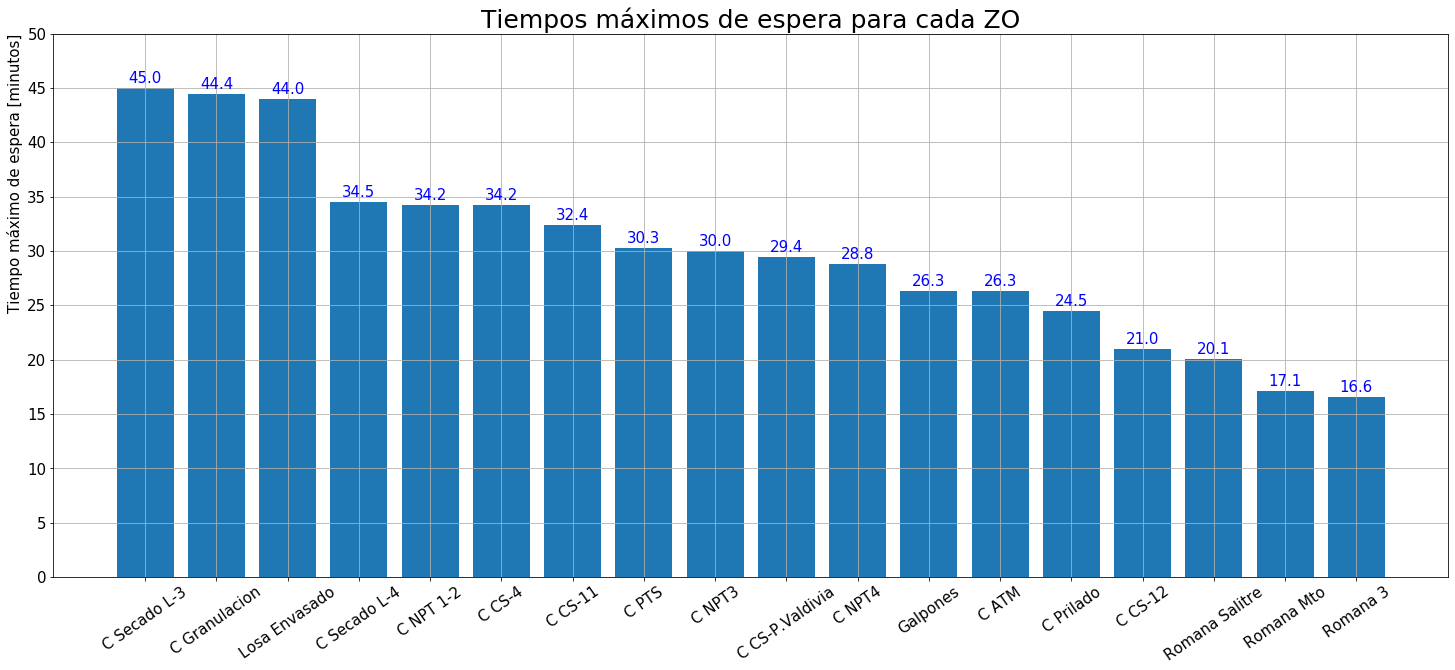

In [7]:
plt.figure(figsize=(25,10))
plt.bar(pesos['zonas'],pesos['pesos'])
plt.ylabel("Tiempo máximo de espera [minutos]",position=(1,1),ha='right',fontsize=15)
plt.title("Tiempos máximos de espera para cada ZO",fontsize=25)
plt.xticks(pesos['zonas'],fontsize=15,rotation=35)
plt.yticks(np.arange(0,51,5),fontsize=15)
for index, value in enumerate(pesos['pesos']):
     plt.text(index,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index,value+0.2))
plt.grid(True)
plt.savefig('pesos_por_zona.png')
plt.show()


In [8]:
def analisis_por_dia_2(df,dia_inicial,dia_final,hora_incial=1,hora_final=25,name=None,condicion='end',metric='max',zonas=None):
    "Nos entrega el análisis por una cantidad X de dias, toma los días del año"
    count = 0
    df_final = None
    for i in range(dia_inicial,dia_final+1):
        #print(i)
        aux = dict_to_df_2(vehiculos_cola(df,i,i,1,25,condicion),zonas)
        if count == 0:
            df_final = aux
            count += 1
        else:
            if (metric == 'max'):
                df_final = pd.concat([df_final, aux]).max(level=0)   #Aquí indico que necesito los peaks
            elif (metric == 'mean'):
                df_final = pd.concat([df_final,aux]).mean(level=0)
    if name != None:
        df_final.sort_index(axis=0).to_csv(name,index=False)
    return df_final.sort_index(axis=0)

def dict_to_df_2(dictionary,zonas=None):
    """ Pasamos de Dicionario a df de la forma que nosotros necesitamos"""
    if zonas == None:
        zonas = ['Romana Salitre', 'C Secado L-4', 'C PTS', 'C NPT3', 'Romana Mto', 'C ATM', 'C NPT 1-2', 'C Prilado', 'Losa Envasado', 'C CS-4',
                 'C Secado L-3', 'C Granulacion', 'Galpones', 'C NPT4', 'C CS-12', 'C CS-P.Valdivia', 'Romana 3', 'C CS-11']
    test = np.arange(1,25,1)
    count=0
    #print(dictionary.items(), len(dictionary.items()))
    if len(dictionary.items()) == 0 :
        dictionary = {'Galpones':{0:0}}
    for k, v in dictionary.items():
        
        a = pd.DataFrame.from_dict(v,'index')
        a = a.rename(columns={a.columns[0]:k})
        for i in test:
            if i not in a.index:
                #print("no esta este indice", i)
                a.loc[i] = 0.
        a = a.sort_index(axis=0)
        if (count == 0):
            b = a
            count +=1
            continue 
        else:
            b=pd.concat([b,a],axis=1)
    b = b.fillna(0.)
    cols_b = b.keys().tolist()
    diff = list(set(zonas) - set(cols_b))
    if (len(diff) > 0):
        for i in diff:
            b[i] = 0.
    
    b = b.reindex(sorted(b.columns), axis=1)
    return b


In [9]:
def monetizacion(df,df_,zona,dia,fin=None,tiempo_ideal=None,zonas=None):
    """Entrega las horas perdidas, camiones perdidos y dinero max y min perdido para un
    determinado tiempo y zona operacional"""
    #Parametros
    toneladas = 29.5
    price_min = 9500 
    price_max = 13000
    hr_job = 16    
    if fin == None:
        fin = dia
    for i in range(dia,fin+1): 
        prom_cola = analisis_por_dia_2(df,i,i,1,25,None,condicion='end',metric='mean',zonas=zonas)
        a = stack_by_day(df_,zona,i,i,metric='mean')
        a['minutos'] = a['minutos/camion']*a['camiones']

        #calculo de dif_time
        dif_time = pd.concat([a[['block','minutos']],prom_cola[zona]],axis=1)
        dif_time["diferencia"] = dif_time['minutos']- dif_time[zona]*tiempo_ideal
        dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   

        #MONETIZACIÓN
        horas = (dif_time['diferencia'].sum())/60.  #horas perdidas por dia
        camiones = horas/hr_job                     #turnos camion perdidos
        precio_minimo = (camiones * toneladas * price_min)/1000000.
        precio_maximo = (camiones * toneladas * price_max)/1000000.

        if i == dia:
            atributos = [horas,camiones,precio_minimo,precio_maximo]
        else:
            atributos = [horas+atributos[0],camiones+atributos[1],precio_minimo+atributos[2],precio_maximo+atributos[3]]
    return atributos


## MONETIZACION CON NUEVOS PESOS (SIMULACION DE AHORRO)

__promedio de pesos es 27.5__

In [45]:
pesos_ajustados = pesos
#print(pesos_ajustados.describe())
pesos_ajustados = pesos_ajustados.replace([45,44.4,44,34.5,34.2],27.5)
pesos_ajust = []
for i in  pesos_ajustados.iterrows():
    pesos_ajust.append([i[1][0],i[1][1]])
print(pesos_ajust)

[['C Secado L-3', 27.5], ['C Granulacion', 27.5], ['Losa Envasado', 27.5], ['C Secado L-4', 27.5], ['C NPT 1-2', 27.5], ['C CS-4', 27.5], ['C CS-11', 32.4], ['C PTS', 30.3], ['C NPT3', 30.0], ['C CS-P.Valdivia', 29.4], ['C NPT4', 28.8], ['Galpones', 26.3], ['C ATM', 26.3], ['C Prilado', 24.5], ['C CS-12', 21.0], ['Romana Salitre', 20.1], ['Romana Mto', 17.1], ['Romana 3', 16.6]]


In [46]:
dias_mes = [[1,31],[32,60],[61,91],[92,121],[122,152],[153,160],[182,212],[213,243],[244,273],[274,304],[305,334],[335,365]]
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses_2020 = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']
meses_2019 = ['Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses_del_año = dict(zip(meses, dias_mes)) 
df = colas_old[~((colas_old['Origin'] == 'Coya Sur') & (colas_old['Destination'] == 'Coya Sur'))]
df_ = colas[~((colas['Origin'] == 'Coya Sur') & (colas['Destination'] == 'Coya Sur'))]
final_result = []

for zona in pesos_ajust:
    df_aux_1 = df[df['ZO']==zona[0]]
    df_aux_2 = df_[df_['ZO']==zona[0]]
    for mes in meses:
        print(mes,zona)
        aux = [mes,zona[0]]
        aux_2 = monetizacion(df_aux_1,df_aux_2,zona[0],meses_del_año[mes][0],meses_del_año[mes][1],zona[1])
        result = aux + aux_2
        final_result.append(result)
        clear_output(wait=True)

data = pd.DataFrame(final_result,columns=['Mes','zona','Horas Perdidas','Turnos Camion','Precio Min [Millones CLP]','Precio Max [Millones CLP]'])
data["Precio Promedio [Millones CLP]"] = (data["Precio Max [Millones CLP]"] + data["Precio Min [Millones CLP]"])/2.
data.to_csv("perdidas_mensuales_por_zona_final_ajustado_ahorro_v1.csv")

Diciembre ['Romana 3', 16.6]


In [47]:
data.iloc[:,3:].sum()

Turnos Camion                     1796.205625
Precio Min [Millones CLP]          503.386626
Precio Max [Millones CLP]          688.844857
Precio Promedio [Millones CLP]     596.115742
dtype: float64

In [17]:
# dias_mes = [[1,31],[32,60],[61,91],[92,121],[122,152],[153,160],[182,212],[213,243],[244,273],[274,304],[305,334],[335,365]]
# meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
# meses_2020 = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']
# meses_2019 = ['Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
# meses_del_año = dict(zip(meses, dias_mes)) 
# df = colas_old[~((colas_old['Origin'] == 'Coya Sur') & (colas_old['Destination'] == 'Coya Sur'))]
# df_ = colas[~((colas['Origin'] == 'Coya Sur') & (colas['Destination'] == 'Coya Sur'))]
# final_result = []

# for zona in pesos_zonas:
#     df_aux_1 = df[df['ZO']==zona[0]]
#     df_aux_2 = df_[df_['ZO']==zona[0]]
#     for mes in meses:
#         print(mes,zona)
#         aux = [mes,zona[0]]
#         aux_2 = monetizacion(df_aux_1,df_aux_2,zona[0],meses_del_año[mes][0],meses_del_año[mes][1],zona[1])
#         result = aux + aux_2
#         final_result.append(result)
#         clear_output(wait=True)

# data = pd.DataFrame(final_result,columns=['Mes','zona','Horas Perdidas','Turnos Camion','Precio Min [Millones CLP]','Precio Max [Millones CLP]'])
# data["Precio Promedio [Millones CLP]"] = (data["Precio Max [Millones CLP]"] + data["Precio Min [Millones CLP]"])/2.
# data.to_csv("perdidas_mensuales_por_zona_final_v1.csv")
#data = pd.read_csv("perdidas_mensuales_por_zona_final_v1.csv")

In [19]:
data.iloc[:,3:].sum()

Horas Perdidas                    27257.546667
Turnos Camion                      1703.596667
Precio Min [Millones CLP]           477.432966
Precio Max [Millones CLP]           653.329322
Precio Promedio [Millones CLP]      565.381144
dtype: float64

# Analisis de Zonas 

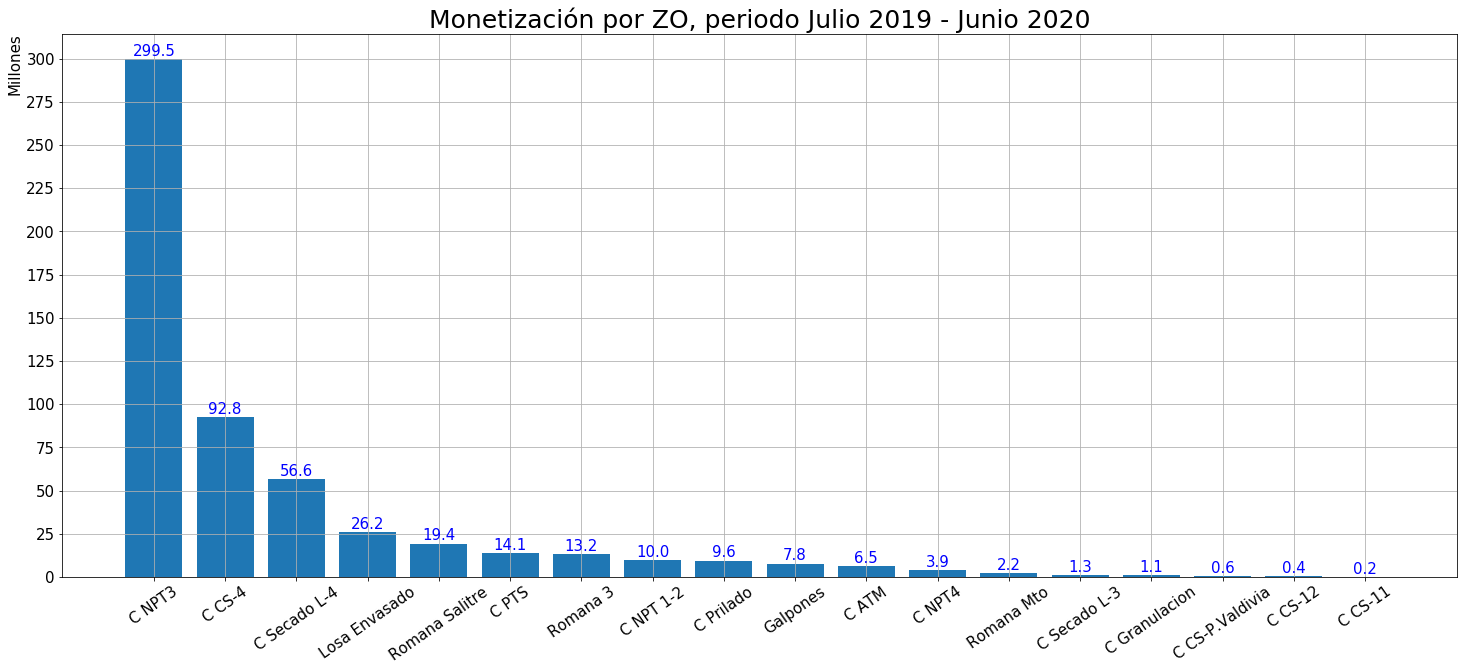

In [21]:
zonas_monetizacion = []
for i in pesos_zonas:
    suma = data[data['zona']==i[0]].iloc[:,3:].sum()
    zonas_monetizacion.append([i[0],suma[0],suma[1],suma[2],suma[3],suma[4]])
    
monetizacion_zone = pd.DataFrame(zonas_monetizacion,columns=['Zona','Horas Peridas','Turnos camion','Valor Min [Millones CLP]','Valor Max [Millones CLP]','Valor Promedio [Millones]'])
monetizacion_zone = monetizacion_zone.sort_values('Valor Promedio [Millones]',ascending=False)

plt.figure(figsize=(25,10))
plt.bar(monetizacion_zone['Zona'],monetizacion_zone['Valor Promedio [Millones]'])
plt.ylabel("Millones",position=(1,1),ha='right',fontsize=15)
plt.title("Monetización por ZO, periodo Julio 2019 - Junio 2020",fontsize=25)
plt.xticks(monetizacion_zone['Zona'],fontsize=15,rotation=35)
plt.yticks(np.arange(0,301,25),fontsize=15)
for index, value in enumerate(monetizacion_zone['Valor Promedio [Millones]']):
     plt.text(index,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index,value+0.2))
plt.grid(True)
plt.savefig('monetizacion_por_zona_2019-2020.png')
plt.show()

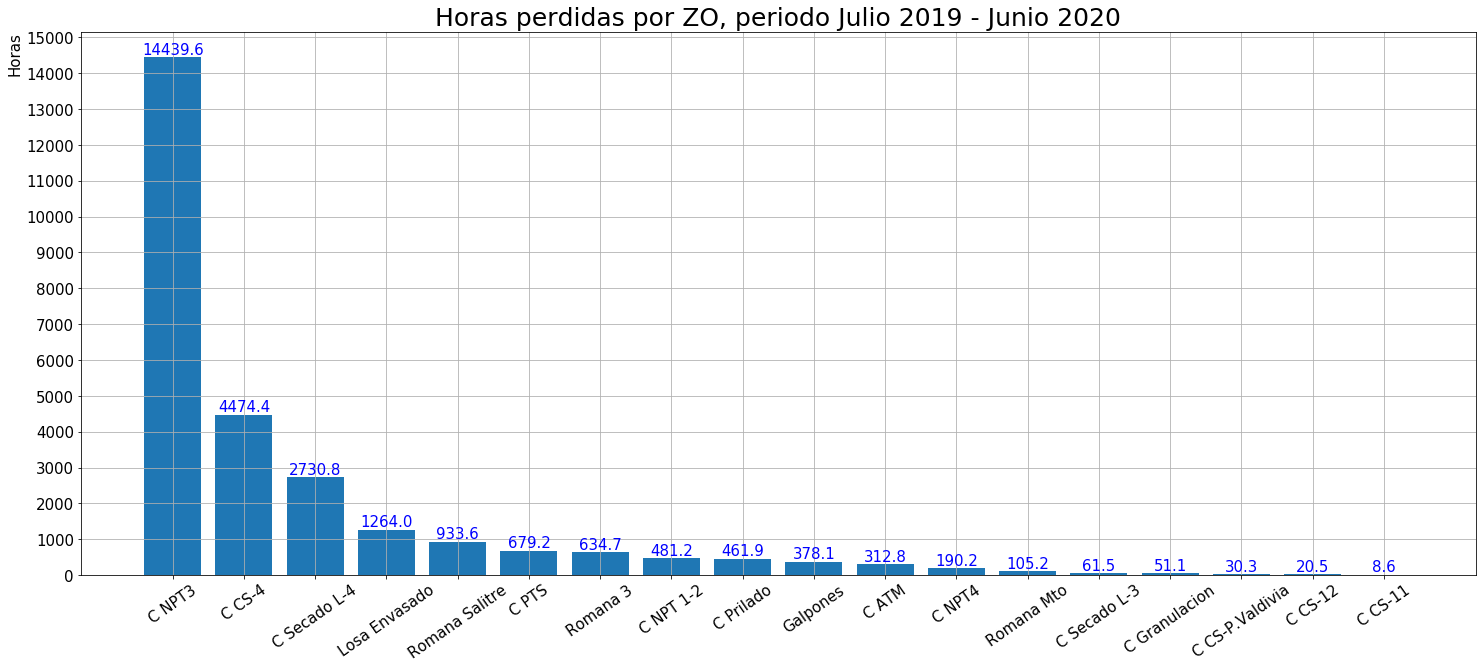

In [22]:
plt.figure(figsize=(25,10))
plt.bar(monetizacion_zone['Zona'],monetizacion_zone['Horas Peridas'])
plt.ylabel("Horas",position=(1,1),ha='right',fontsize=15)
plt.title("Horas perdidas por ZO, periodo Julio 2019 - Junio 2020",fontsize=25)
plt.xticks(monetizacion_zone['Zona'],fontsize=15,rotation=35)
plt.yticks(np.arange(0,15001,1000),fontsize=15)
for index, value in enumerate(monetizacion_zone['Horas Peridas']):
     plt.text(index,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index,value+0.2))
plt.grid(True)
plt.savefig('horas_perdidas_por_zona_2019-2020.png')
plt.show()

# Analisis de Bloques Horario 

In [103]:
def monetizacion_horaria(df,df_,dia,fin=None,tiempo_ideal=None,zonas=None):
    """Entrega las horas perdidas, camiones perdidos y dinero max y min perdido para un
    determinado tiempo y zona operacional"""   
    #Parametros
    toneladas = 29.5
    price_min = 9500 
    price_max = 13000
    hr_job = 16
    if fin == None:
        fin = dia
    count = 0
    contador = 0
    for i in range(dia,fin+1): 
        prom_cola = analisis_por_dia_2(df,i,i,1,25,None,condicion='end',metric='mean',zonas=None)
        for j in zonas:
            a = stack_by_day(df_,j[0],i,i,metric='mean')
            a['minutos'] = a['minutos/camion']*a['camiones']
            print(i,j)
            #calculo de dif_time
            dif_time = pd.concat([a[['block','minutos']],prom_cola[j[0]]],axis=1)
            #print(dif_time)
            dif_time = dif_time.rename(columns={j[0]: "camiones/bloque"})
            #print(dif_time)
            dif_time["diferencia min"] = dif_time['minutos']- dif_time["camiones/bloque"]*j[1]
            dif_time.loc[dif_time['diferencia min'] < 0, 'diferencia min'] = 0   
            #concatenamos los dias
            if count == 0:
                df_aux = dif_time
                count +=1
            else:
                df_aux = df_aux + dif_time
            contador += 1
            clear_output(wait=True)

    #MONETIZACIÓN
    df_aux['block'] = df_aux['block']/contador
    horas = (df_aux['diferencia min'].sum())/60.
    camiones = horas/hr_job
    precio_minimo = (camiones * toneladas * price_min)/1000000.
    precio_maximo = (camiones * toneladas * price_max)/1000000.
    atributos = [horas,camiones,precio_minimo,precio_maximo]
    precio_promedio = (price_max+price_min)/2
    df_aux['horas'] = df_aux['diferencia min']/60.
    df_aux['camiones'] = df_aux['horas']/hr_job
    df_aux['Monetizacion [Millones]'] = (df_aux['camiones']*toneladas * precio_promedio)/1000000
    df_horarios = df_aux[['block','horas','camiones','Monetizacion [Millones]']]
    return df_horarios.rename(columns={'horas': "horas perdidas", 'camiones':'turnos camion'})

In [104]:
zonas_sort = monetizacion_zone['Zona'].tolist()
df_horario_2020 = monetizacion_horaria(colas_old,colas,1,160,zonas=pesos_zonas)
df_horario_2019 = monetizacion_horaria(colas_old,colas,181,365,zonas=pesos_zonas)
df_horario_anual = df_horario_2019 + df_horario_2020
df_horario_anual['block'] = df_horario_anual['block']/2
df_horario_anual.to_csv('monetizacion_por_horario_final_v1.csv')

365 ['Romana 3', 16.6]


In [107]:
df_horario_anual

block  horas perdidas  turnos camion  Monetizacion [Millones]
1     1.0       29.301667       1.831354                 0.607781
2     2.0       84.158333       5.259896                 1.745628
3     3.0      195.916667      12.244792                 4.063740
4     4.0      605.515000      37.844687                12.559706
5     5.0     1432.656667      89.541042                29.716433
6     6.0     1768.300000     110.518750                36.678410
7     7.0     1377.393333      86.087083                28.570151
8     8.0     1197.955000      74.872188                24.848207
9     9.0     1246.365000      77.897813                25.852337
10   10.0     1805.735000     112.858438                37.454894
11   11.0     2292.173333     143.260833                47.544689
12   12.0     1918.588333     119.911771                39.795719
13   13.0     1670.975000     104.435938                34.659677
14   14.0     1439.056667      89.941042                29.849183
15   15.0     1223.325000      76.457813                25.374437
16   16.0     1527.658333      95.478646                31.686976
17   17.0     2720.290000     170.018125                56.424765
18   18.0     2470.685000     154.417812                51.247412
19   19.0     1248.821667      78.051354                25.903293
20   20.0      622.628333      38.914271                12.914674
21   21.0      363.036667      22.689792                 7.530175
22   22.0      458.923333      28.682708                 9.519074
23   23.0      338.063333      21.128958                 7.012173
24   24.0        8.541667       0.533854                 0.177173

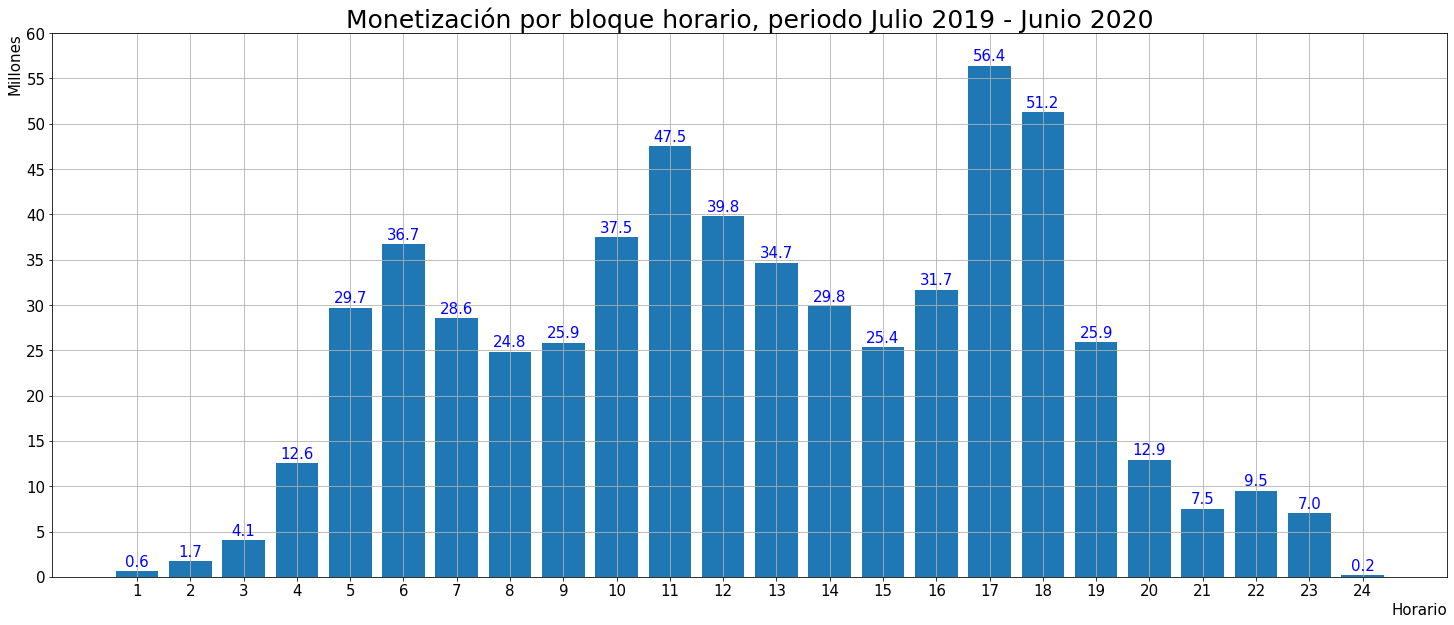

In [116]:
plt.figure(figsize=(25,10))
plt.bar(df_horario_anual['block'],df_horario_anual['Monetizacion [Millones]'])
plt.xlabel("Horario",position=(1,1),ha='right',fontsize=15)
plt.ylabel("Millones",position=(1,1),ha='right',fontsize=15)
plt.title("Monetización por bloque horario, periodo Julio 2019 - Junio 2020",fontsize=25)
plt.xticks(df_horario_anual['block'],fontsize=15)
plt.yticks(np.arange(0,61,5),fontsize=15)
for index, value in enumerate(df_horario_anual['Monetizacion [Millones]']):
     plt.text(index+1,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index+1,value+0.2))
plt.grid(True)
plt.savefig('monetizacion_por_bloque_final_v1.png')
plt.show()

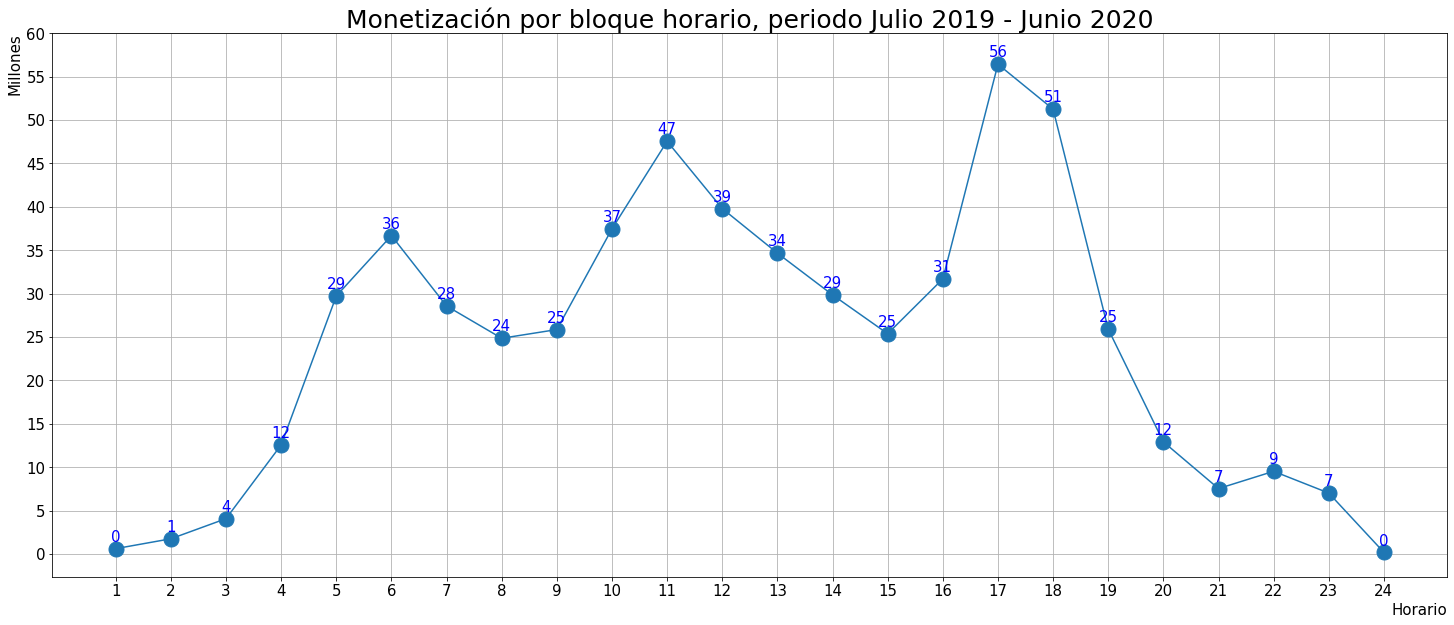

In [148]:
plt.figure(figsize=(25,10))
plt.plot(df_horario_anual['block'],df_horario_anual['Monetizacion [Millones]'],marker='o',markersize=15)
plt.xlabel("Horario",position=(1,1),ha='right',fontsize=15)
plt.ylabel("Millones",position=(1,1),ha='right',fontsize=15)
plt.title("Monetización por bloque horario, periodo Julio 2019 - Junio 2020",fontsize=25)
plt.xticks(df_horario_anual['block'],fontsize=15)
plt.yticks(np.arange(0,61,5),fontsize=15)
for index, value in enumerate(df_horario_anual['Monetizacion [Millones]']):
     plt.text(index+1,value,str(int(value)),fontsize=15,color='b',ha='center',va='bottom',position=(index+1,value+0.5))
plt.grid(True)
plt.savefig('monetizacion_por_bloque_final_v2.png')
plt.show()

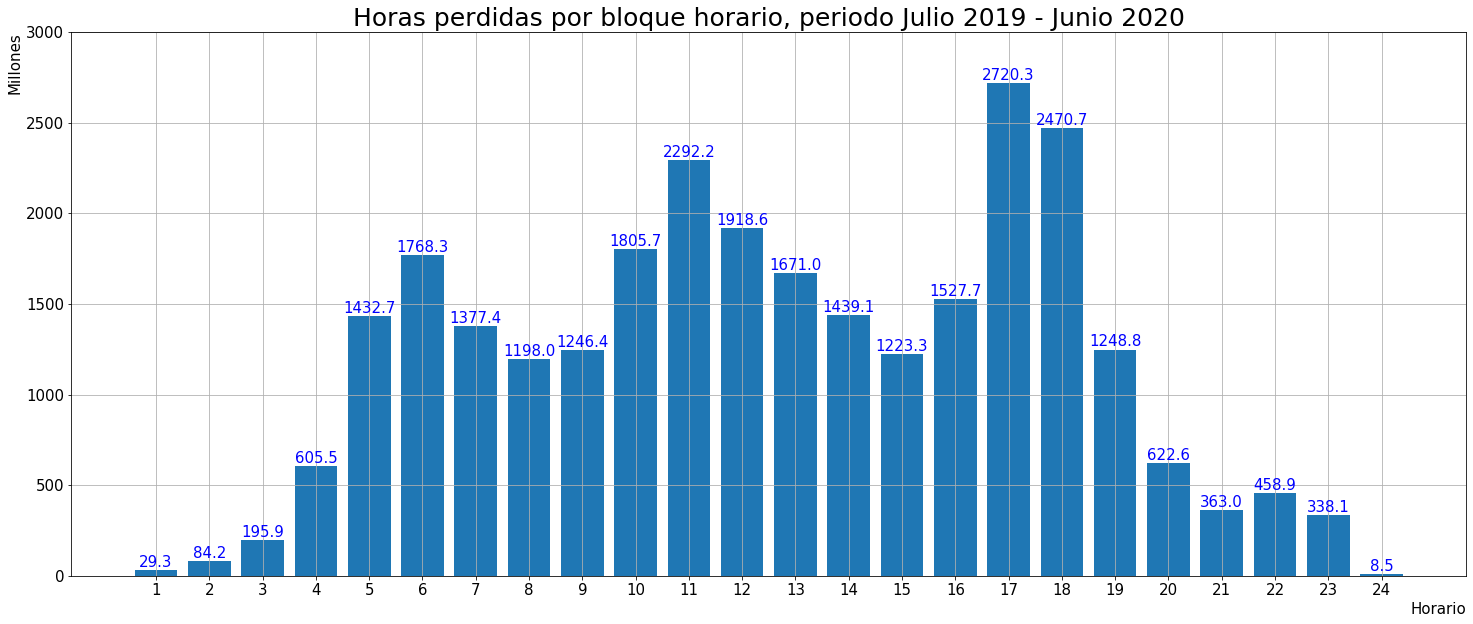

In [121]:
plt.figure(figsize=(25,10))
plt.bar(df_horario_anual['block'],df_horario_anual['horas perdidas'])
plt.xlabel("Horario",position=(1,1),ha='right',fontsize=15)
plt.ylabel("Millones",position=(1,1),ha='right',fontsize=15)
plt.title("Horas perdidas por bloque horario, periodo Julio 2019 - Junio 2020",fontsize=25)
plt.xticks(df_horario_anual['block'],fontsize=15)
plt.yticks(np.arange(0,3001,500),fontsize=15)
for index, value in enumerate(df_horario_anual['horas perdidas']):
     plt.text(index+1,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index+1,value+0.2))
plt.grid(True)
plt.savefig('horas_perdidas_por_bloque_final_v1.png')
plt.show()

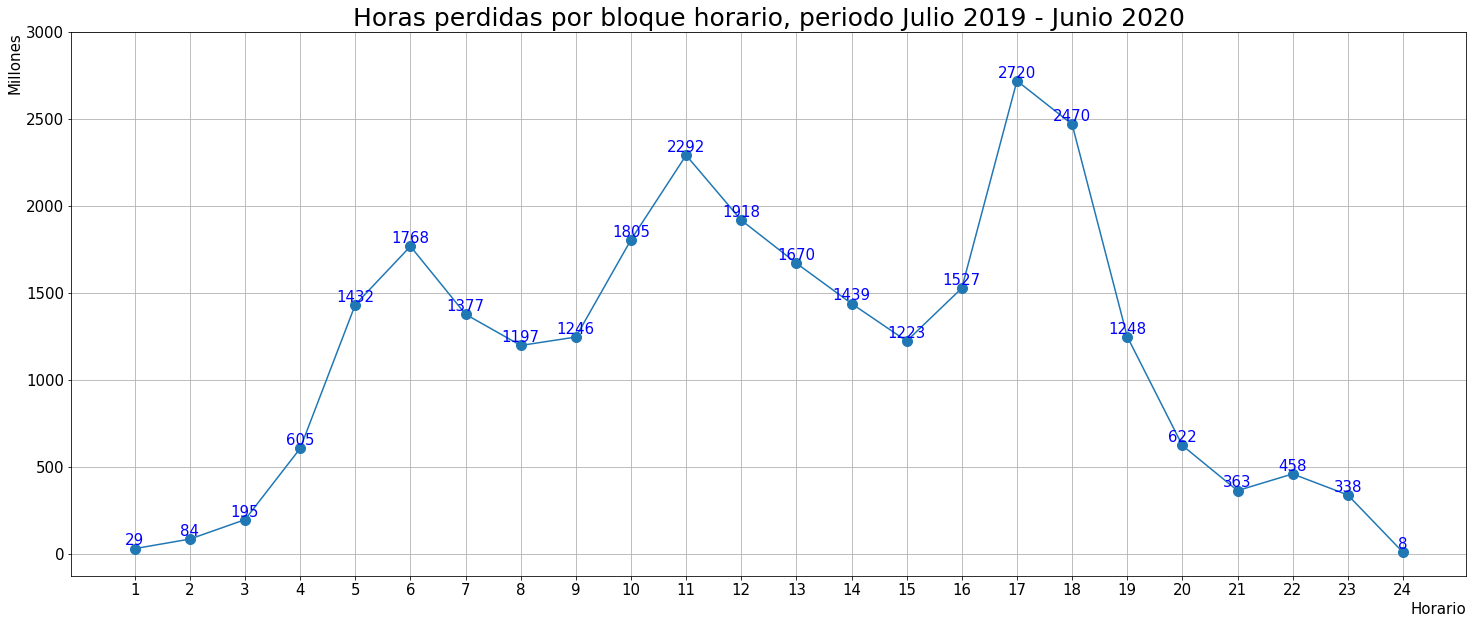

In [147]:
plt.figure(figsize=(25,10))
plt.plot(df_horario_anual['block'],df_horario_anual['horas perdidas'],marker='o',markersize=10)
plt.xlabel("Horario",position=(1,1),ha='right',fontsize=15)
plt.ylabel("Millones",position=(1,1),ha='right',fontsize=15)
plt.title("Horas perdidas por bloque horario, periodo Julio 2019 - Junio 2020",fontsize=25)
plt.xticks(df_horario_anual['block'],fontsize=15)
plt.yticks(np.arange(0,3001,500),fontsize=15)
for index, value in enumerate(df_horario_anual['horas perdidas']):
     plt.text(index+1,value,str(int(value)),fontsize=15,color='b',ha='center',va='bottom',position=(index+1,value+0.7))
plt.grid(True)
plt.savefig('horas_perdidas_por_bloque_final_v2.png')
plt.show()

# Extrapolaciones

## Año 2020

In [134]:
año_2020 = data[(data['Mes'] == 'Enero') | (data['Mes'] == 'Febrero') | (data['Mes'] == 'Marzo') | (data['Mes'] == 'Abril') | (data['Mes'] == 'Mayo')]

print(" 5 Meses \n",año_2020.sum()[2:])
print("Mensual \n",año_2020.sum()[2:]/5)

 5 Meses 
 Horas Perdidas                    15271.6
Turnos Camion                     954.475
Precio Min [Millones CLP]         267.492
Precio Max [Millones CLP]         366.041
Precio Promedio [Millones CLP]    316.766
dtype: object
Mensual 
 Horas Perdidas                    3054.32
Turnos Camion                     190.895
Precio Min [Millones CLP]         53.4983
Precio Max [Millones CLP]         73.2083
Precio Promedio [Millones CLP]    63.3533
dtype: object


# Año 2019-2020

In [136]:
año = data[(data['Mes'] != 'Junio')]

print(" 11 Meses \n",año.sum()[2:])
print("Mensual \n",año.sum()[2:]/11)

 11 Meses 
 Horas Perdidas                    26519.3
Turnos Camion                     1657.46
Precio Min [Millones CLP]         464.503
Precio Max [Millones CLP]         635.635
Precio Promedio [Millones CLP]    550.069
dtype: object
Mensual 
 Horas Perdidas                    2410.85
Turnos Camion                     150.678
Precio Min [Millones CLP]         42.2275
Precio Max [Millones CLP]          57.785
Precio Promedio [Millones CLP]    50.0063
dtype: object
